# Diabetes Classification Using 7 ML Models

## Data Preprocessing

### Import Relevant Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost



### Import UCI Dataset

In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Split into Training and Testing + Scale Data

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




## Exploratory Analysis

### Dataset Statistics and Missing Values

In [56]:
# Display basic statistics of the dataset
print("Dataset Statistics:")
print(X.describe())

# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())

Dataset Statistics:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000

### Target Distribution

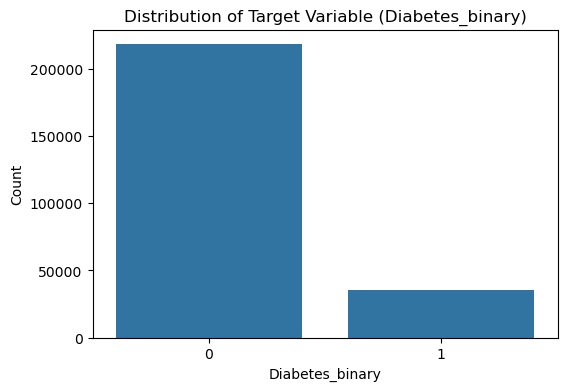

In [57]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y['Diabetes_binary'])
plt.title("Distribution of Target Variable (Diabetes_binary)")
plt.xlabel("Diabetes_binary")
plt.ylabel("Count")
plt.show()

### Correlation Matrix

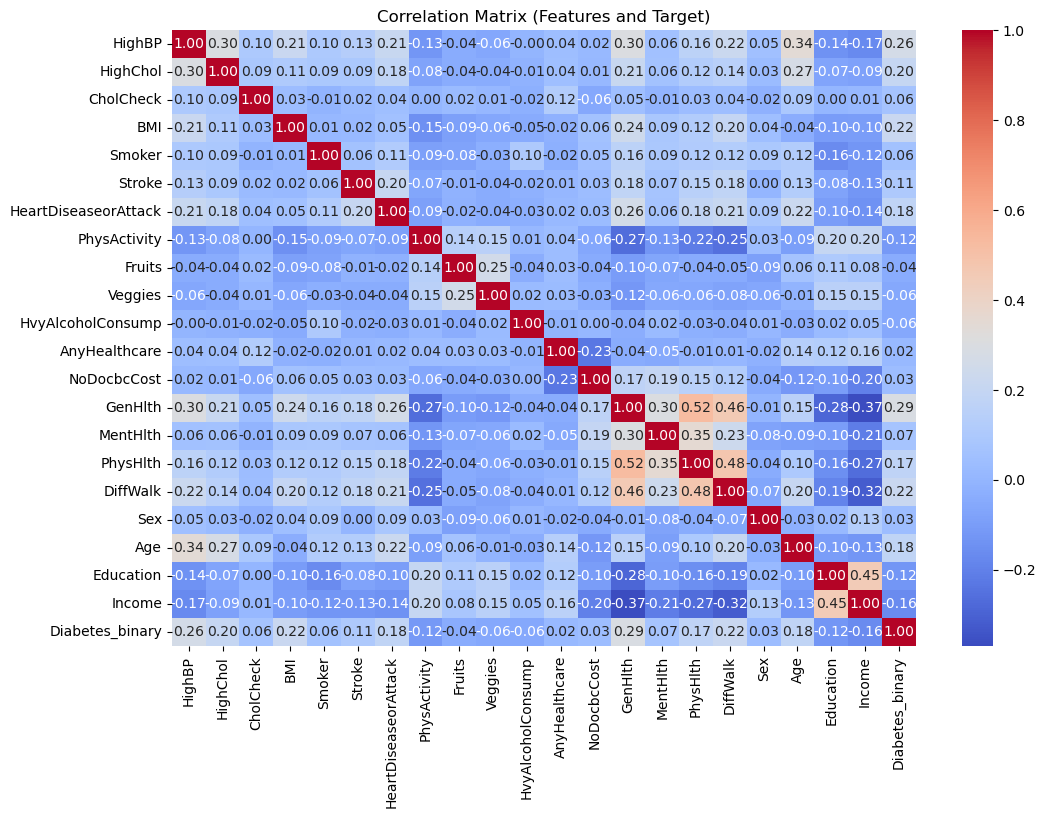

In [58]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Features and Target)")
plt.show()

## Helper Functions

### Initialize Results Storage

In [59]:
 #list to store results
results = []


### Function to Train and Evaluate the Models

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

# Function to train and evaluate models
def train_evaluate_model(model_name, model, X_test, y_test):
    
    # Fit the model
    model.fit(X_train, y_train.values.ravel()) 

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Append results to the list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        "F1 Score": f1_score(y_test, y_pred),
    })


## Model Training and Evaluation

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression()

# Train and evaluate the model
train_evaluate_model("Logistic Regression", log_reg, X_test, y_test)

Accuracy: 0.8658940397350994
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

Confusion Matrix:
 [[42775   964]
 [ 5840  1157]]
ROC AUC Score: 0.8263596542959626


### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train and evaluate the model
train_evaluate_model("Decision Tree", dt, X_test, y_test)

Accuracy: 0.7985848312835068
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     43739
           1       0.30      0.34      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736

Confusion Matrix:
 [[38172  5567]
 [ 4652  2345]]
ROC AUC Score: 0.6028002898545393


### Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train and evaluate the model
train_evaluate_model("Random Forest", rf, X_test, y_test)

Accuracy: 0.8597642699463891
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.48      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

Confusion Matrix:
 [[42402  1337]
 [ 5778  1219]]
ROC AUC Score: 0.8015463561718956


### K-Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the model
train_evaluate_model("K-Nearest Neighbors", knn_clf, X_test, y_test)


Accuracy: 0.8468345947650583
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     43739
           1       0.40      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736

Confusion Matrix:
 [[41498  2241]
 [ 5530  1467]]
ROC AUC Score: 0.7225754416023644


### Naive Bayes 

In [65]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_clf = GaussianNB()

# Train and evaluate the model
train_evaluate_model("Naive Bayes", nb_clf, X_test, y_test)

Accuracy: 0.771996215704825
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86     43739
           1       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736

Confusion Matrix:
 [[35211  8528]
 [ 3040  3957]]
ROC AUC Score: 0.7860311936556714


### Extreme Gradient Boosting

In [66]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

# Train and evaluate the model
train_evaluate_model("XGBoost", xgb_clf, X_test, y_test)


Accuracy: 0.8670963418479974
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.56      0.18      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

Confusion Matrix:
 [[42747   992]
 [ 5751  1246]]
ROC AUC Score: 0.8318973376913047


### Adaptive Gradient Boosting

In [67]:
from sklearn.ensemble import AdaBoostClassifier 

# AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=42) 

# Train and evaluate the model
train_evaluate_model("AdaBoost", ada_clf, X_test, y_test)

Accuracy: 0.8653815830968149
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93     43739
           1       0.53      0.19      0.28      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.58      0.60     50736
weighted avg       0.83      0.87      0.84     50736

Confusion Matrix:
 [[42587  1152]
 [ 5678  1319]]
ROC AUC Score: 0.8269608940946472


## Final Model Comparison and Plots

### Comparison Data Frame

In [68]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results) 

# Print and Sort the DataFrame by Accuracy
print(results_df.sort_values(by="Accuracy", ascending=False)) 

                 Model  Accuracy  ROC AUC Score  F1 Score
5              XGBoost  0.867096       0.831897  0.269843
0  Logistic Regression  0.865894       0.826360  0.253784
6             AdaBoost  0.865382       0.826961  0.278623
2        Random Forest  0.859764       0.801546  0.255208
3  K-Nearest Neighbors  0.846835       0.722575  0.274078
1        Decision Tree  0.798585       0.602800  0.314575
4          Naive Bayes  0.771996       0.786031  0.406221


### ROC Curves 

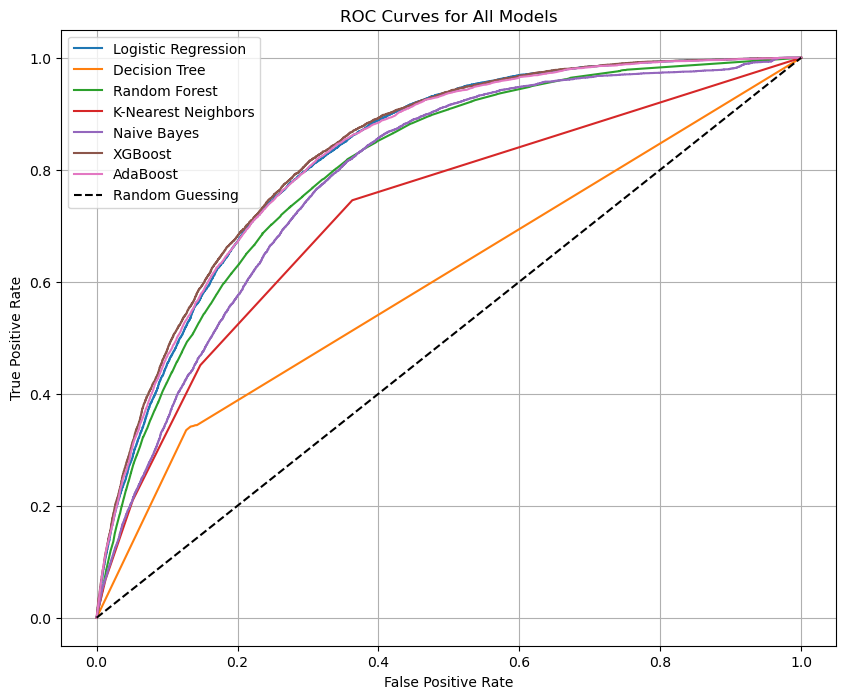

In [69]:
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

# Plot ROC curves for all models on one plot
def plot_all_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10,8))
    
    for model_name, model in models.items():
        # Get predicted probabilities
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_name}")

    # Plot diagonal line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

    # Add plot details
    plt.title("ROC Curves for All Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary of models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "K-Nearest Neighbors": knn_clf,
    "Naive Bayes": nb_clf,
    "XGBoost": xgb_clf,
    "AdaBoost": ada_clf
}

# Plot all ROC curves
plot_all_roc_curves(models, X_test, y_test)



### Precision-Recall Curves

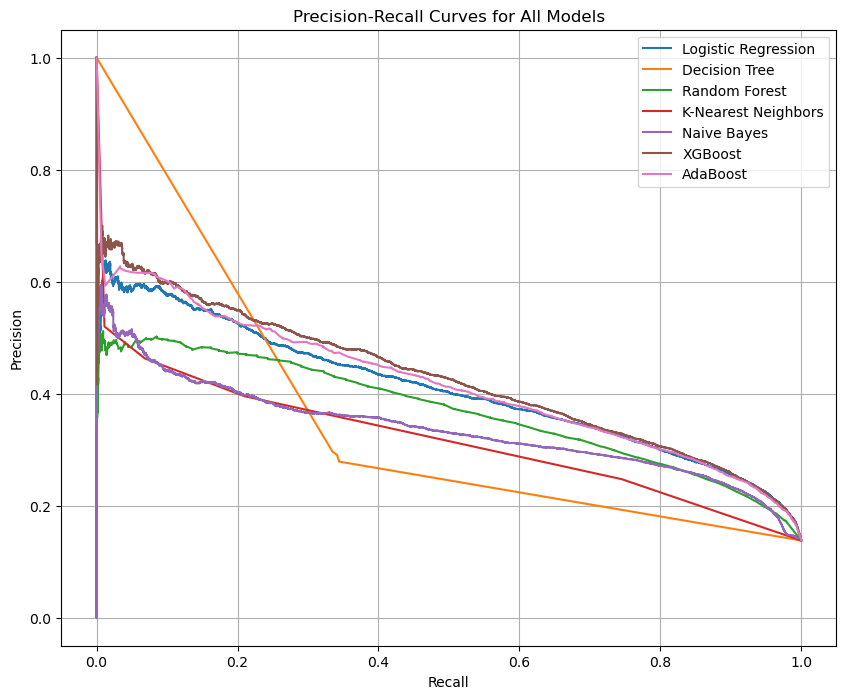

In [70]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Plot Precision-Recall curves for all models on one plot
def plot_all_precision_recall_curves(models, X_test, y_test):
    plt.figure(figsize=(10,8))
    
    for model_name, model in models.items():
        # Get predicted probabilities
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f"{model_name}")

    # Add plot details
    plt.title("Precision-Recall Curves for All Models")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid()
    plt.show()
# Plot all Precision-Recall curves
plot_all_precision_recall_curves(models, X_test, y_test)


### Feature Importance on Tree Based Algorithms

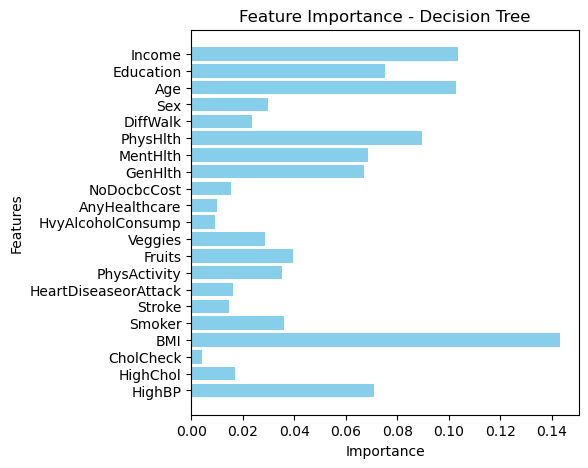

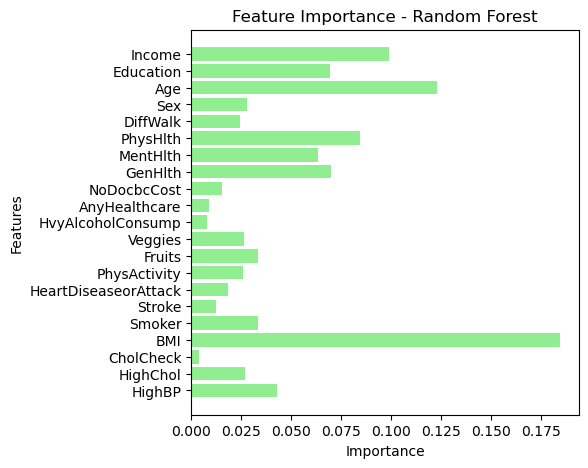

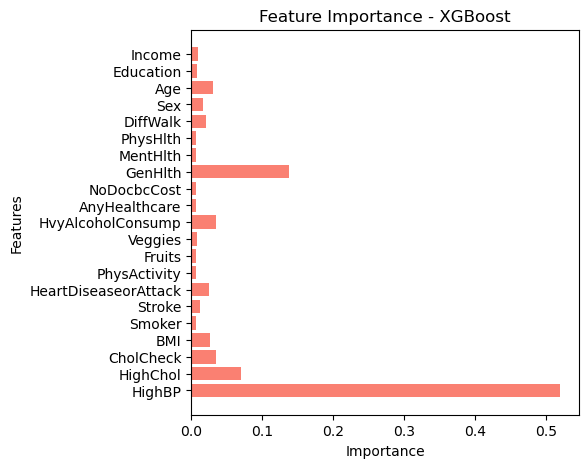

In [71]:
# Feature importance for Decision Tree
plt.figure(figsize=(5,5))
plt.barh(X.columns, dt.feature_importances_, color='skyblue')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Feature importance for Random Forest
plt.figure(figsize=(5,5))
plt.barh(X.columns, rf.feature_importances_, color='lightgreen')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Feature importance for XGBoost
plt.figure(figsize=(5, 5))
plt.barh(X.columns, xgb_clf.feature_importances_, color='salmon')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

